In [1]:
from sklearn.datasets import make_classification
import numpy as np

In [2]:
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

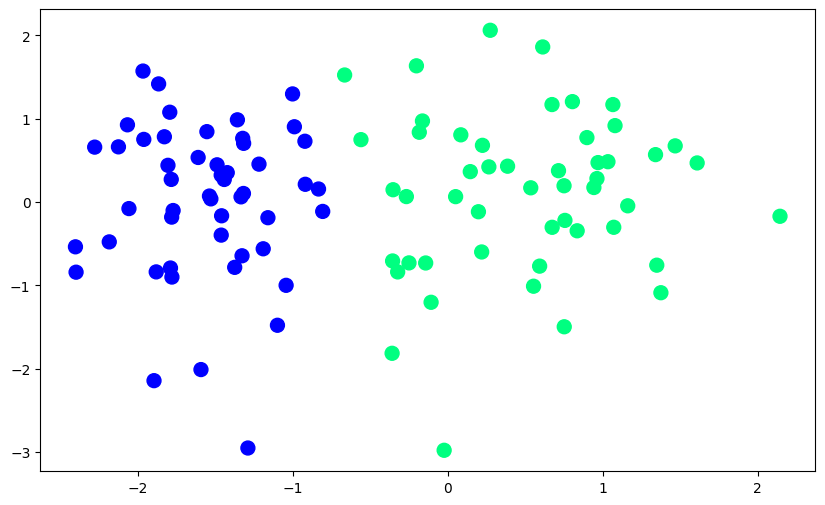

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
def perceptron(X,y):
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.1
    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat=step(np.dot(X[j],weights))
        weights=weights+lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]

In [5]:
def step(z):
    return 1 if z>0 else 0


In [6]:
intercept_,coef_=perceptron(X,y)

In [7]:
print(coef_)
print(intercept_)

[1.31692717 0.15658528]
1.0


In [8]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [9]:
X_input=np.linspace(-3,3,100)
y_input=m*X_input+b

(-3.0, 2.0)

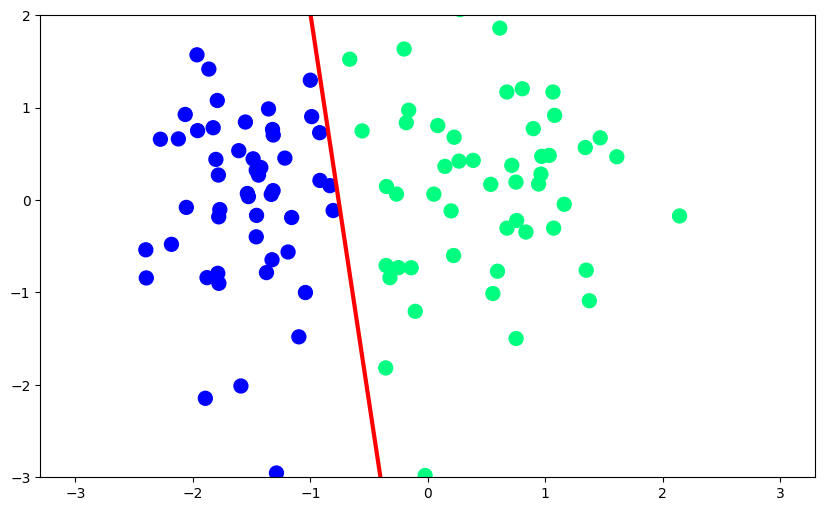

In [10]:
plt.figure(figsize=(10,6))
plt.plot(X_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)


In [11]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [12]:
m,b = perceptron(X,y)

ipympl is not installed. Installing now...


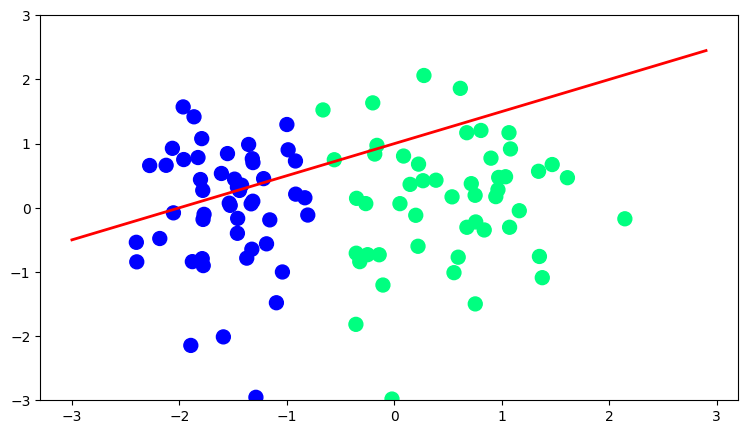

In [14]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt

m = [0.5]  # Assuming m is a list with initial slope
b = [1]    # Assuming b is a list with initial y-intercept

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
fig, ax = plt.subplots(figsize=(9,5))

ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)

def update(i):
  label = 'epoch {0}'.format(i + 1)
  line.set_ydata(x_i*m[i] + b[i])
  ax.set_xlabel(label)

# Install the ipympl extension (if not already installed)
try:
  import ipympl
except ImportError:
  print("ipympl is not installed. Installing now...")
  

# Assign the animation object to a variable
anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

# Render the animation
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [16]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [17]:
x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m +b

(-3.0, 2.0)

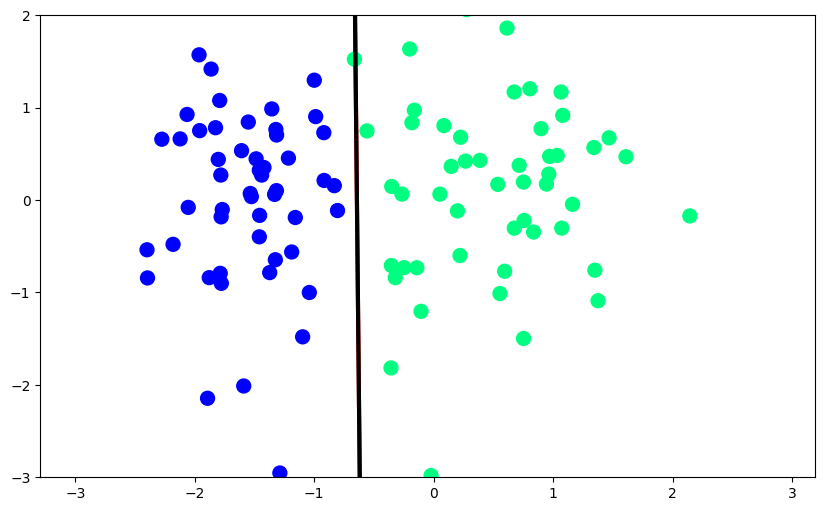

In [18]:
plt.figure(figsize=(10,6))
plt.plot(x_i,y_i,color='red',linewidth=3)
plt.plot(x_i,y_i,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2) 

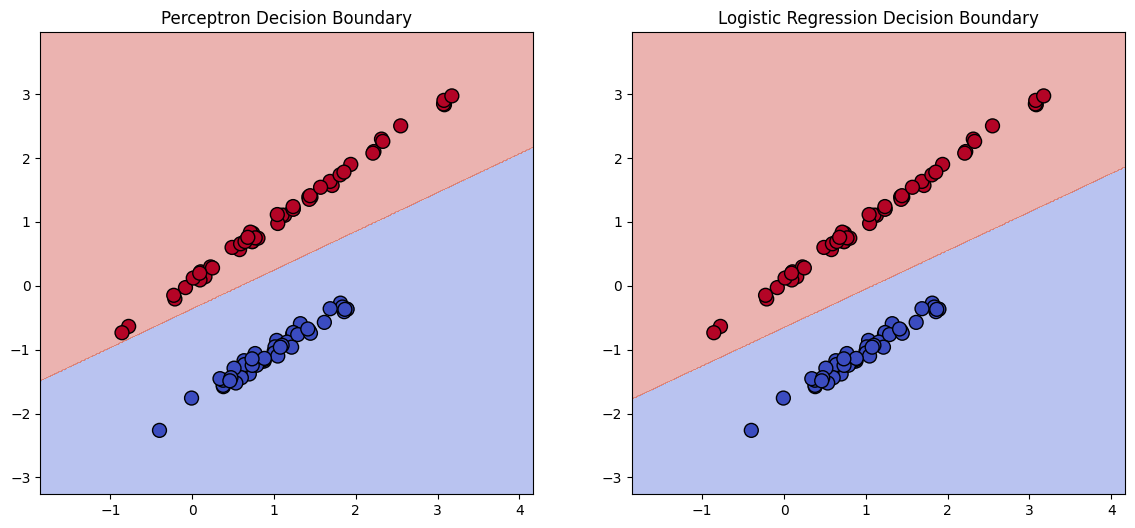

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron, LogisticRegression

# Step 1: Generate random data for binary classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Plotting function for decision boundary
def plot_decision_boundary(X, y, clf, ax):
    # Generate grid points to plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict on the grid and reshape
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k', cmap='coolwarm')

# Step 2: Train Perceptron model
perceptron = Perceptron(max_iter=1000, tol=1e-3)
perceptron.fit(X, y)

# Step 3: Train Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X, y)

# Step 4: Plot both decision boundaries
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Perceptron decision boundary
ax[0].set_title("Perceptron Decision Boundary")
plot_decision_boundary(X, y, perceptron, ax[0])

# Logistic Regression decision boundary
ax[1].set_title("Logistic Regression Decision Boundary")
plot_decision_boundary(X, y, logistic_regression, ax[1])

plt.show()
